# Simulation - Correlated time series

Author: Wei Zhang

This notebook to illustrate the impact passing randomly generated time series through a correlation structure. In this case this has been applied through a Cholesky Decomposition.

In [85]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy import stats

class Monte_Carlo:
    
    @staticmethod
    def Generate_Random_Variables(num_assets,num_timesteps):
        return np.random.randn(num_timesteps,num_assets) # generate matrix of N(0,1) random variables
    
    @staticmethod
    def Generate_Cholesky(X,num_timesteps,correlation_matrix):
        lower_triang_cholesky = np.linalg.cholesky(correlation_matrix) # calculate the cholesky decomp of the provided correlation matrix
        
        new_X = X.copy()
        # apply cholesky decomp to each simulation
        for i in range(num_timesteps):
            new_X[i,:] = np.dot(lower_triang_cholesky,X[i,:])  
        
        return new_X
    
    @staticmethod
    def Generate_Returns(X,mu,sigma):
        return 1 + mu + X*sigma

    @staticmethod
    def Generate_Asset_Prices(correlation_matrix,asset_vol,asset_mu,num_timesteps):
        num_assets = len(asset_vol)
         
        # Generated uncorrelated RVs
        X = Monte_Carlo.Generate_Random_Variables(num_assets,num_timesteps)
                
        # Generate correlated RVs
        X_correlated = Monte_Carlo.Generate_Cholesky(X,num_timesteps,correlation_matrix)
        
        # Generate returns based on individual mu,sigma parameters
        for i in range(num_assets):
            X[:,i] = Monte_Carlo.Generate_Returns(X[:,i],asset_mu[i],asset_vol[i])
            X_correlated[:,i] = Monte_Carlo.Generate_Returns(X_correlated[:,i],asset_mu[i],asset_vol[i])
        
        # return the cumulative products along columns
        return np.cumprod(X,axis=0), np.cumprod(X_correlated,axis=0) 

## Main Script

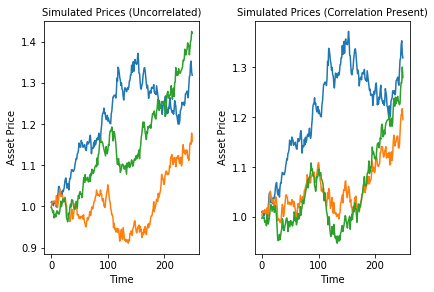

In [81]:
# Enter Simulation Parameter here
sim_parameters = {
    'correlation_matrix':[[1,0.5,0.1],[0.5,1,0.7],[0.1,0.7,1]],
    'asset_vol' : np.array([0.01,0.01,0.01]),
    'asset_mu'  : np.array([0.001,0.001,0.001]),
    'num_timesteps' : 250
}

# Run main functions
asset_prices_uncorrelated, asset_prices_correlated = Monte_Carlo.Generate_Asset_Prices(**sim_parameters)

# Plot results
x = np.array(range(0,250))
plt.subplot(1, 2, 1)
plt.plot(x,asset_prices_uncorrelated[:,0],x,asset_prices_uncorrelated[:,1],x,asset_prices_uncorrelated[:,2])
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Simulated Prices (Uncorrelated)', fontsize=10)

plt.subplot(1, 2, 2,)
plt.plot(x,asset_prices_correlated[:,0],x,asset_prices_correlated[:,1],x,asset_prices_correlated[:,2])
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Simulated Prices (Correlation Present)', fontsize=10)

plt.tight_layout(pad=0.5, w_pad=1.5, h_pad=1.0)
plt.show()